In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
NoShows = pd.read_csv('KaggleV2-May-2016.csv')

In [87]:
NoShows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [88]:
NoShows.rename(columns={'Hipertension':'Hypertension',
                        'Handcap':'Handicap'},inplace=True)

In [89]:
NoShows['Gender'] = NoShows['Gender'].map({'F':1,'M':0})

In [90]:
NoShows['No-show'] = NoShows['No-show'].map({'No':0,'Yes':1})

In [11]:
# NoShows['Gender'].unique()
# its can find how may unique value are there

array(['F', 'M'], dtype=object)

In [91]:
NoShows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [92]:
NoShows['ScheduledDay'] = NoShows['ScheduledDay'].apply(np.datetime64)
NoShows['ScheduledDay'] = NoShows['ScheduledDay'].dt.date

In [93]:
type(NoShows['ScheduledDay'][0])

datetime.date

In [94]:
NoShows['AppointmentDay'] = NoShows['AppointmentDay'].apply(np.datetime64) #datetime64 dtype. This makes the values timestamp objects rather than strings or integers.
NoShows['AppointmentDay'] = NoShows['AppointmentDay'].dt.date # convert the datetime64 values to just dates. This removes the time component, leaving only the date.

In [95]:
NoShows['Waiting Time'] = pd.to_timedelta((NoShows['AppointmentDay'] - NoShows['ScheduledDay'])).dt.days
NoShows['Waiting Time'] = NoShows['Waiting Time'].apply(np.int64)

In [96]:
NoShows['Waiting Time']

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: Waiting Time, Length: 110527, dtype: int64

In [97]:
NoShows= NoShows.drop('PatientId', axis=1)

In [98]:
NoShows= NoShows.drop('AppointmentID', axis=1)

In [99]:
np.sort(NoShows['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [100]:
dummy_col = ['Neighbourhood']
NoShows = pd.get_dummies(NoShows , columns= dummy_col)

In [101]:
NoShows.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No-show', 'Waiting Time', 'Neighbourhood_AEROPORTO',
       'Neighbourhood_ANDORINHAS', 'Neighbourhood_ANTÔNIO HONÓRIO',
       'Neighbourhood_ARIOVALDO FAVALESSA', 'Neighbourhood_BARRO VERMELHO',
       'Neighbourhood_BELA VISTA', 'Neighbourhood_BENTO FERREIRA',
       'Neighbourhood_BOA VISTA', 'Neighbourhood_BONFIM',
       'Neighbourhood_CARATOÍRA', 'Neighbourhood_CENTRO',
       'Neighbourhood_COMDUSA', 'Neighbourhood_CONQUISTA',
       'Neighbourhood_CONSOLAÇÃO', 'Neighbourhood_CRUZAMENTO',
       'Neighbourhood_DA PENHA', 'Neighbourhood_DE LOURDES',
       'Neighbourhood_DO CABRAL', 'Neighbourhood_DO MOSCOSO',
       'Neighbourhood_DO QUADRO', 'Neighbourhood_ENSEADA DO SUÁ',
       'Neighbourhood_ESTRELINHA', 'Neighbourhood_FONTE GRANDE',
       'Neighbourhood_FORTE SÃO JOÃO', 'Neighbourhood_FRADINHOS',
       'Neighbourhoo

In [48]:
## Training the neural network

In [145]:
Training_vars = ['Gender','Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received','Waiting Time', 'No-show']

In [146]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(NoShows, test_size = 0.15)

In [147]:
train_x = train[Training_vars]
train_y = train['No-show']

test_x = test[Training_vars]
test_y = test['No-show']

In [154]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(5,2))  # 9 nodes and 5 hidden nodes and 2 hidden layer


In [155]:
model.fit(train_x,train_y)

MLPClassifier(hidden_layer_sizes=(5, 2))

In [156]:
prediction = model.predict_proba(test_x)
proba_predict = prediction[:,1]

In [157]:
prediction

array([[9.99999853e-01, 1.47417871e-07],
       [9.99999751e-01, 2.48997938e-07],
       [2.66217533e-04, 9.99733782e-01],
       ...,
       [9.99999838e-01, 1.62178546e-07],
       [9.99999763e-01, 2.37179029e-07],
       [9.99999869e-01, 1.30752386e-07]])

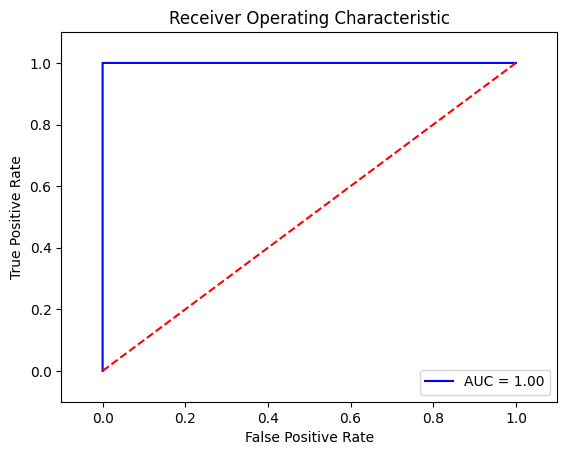

In [160]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test_y, proba_predict)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()